In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## 0. Data processing and visualization
load winequality-white.csv dataset and make exploratory data analysis

In [2]:
df= pd.read_csv('winequality-white.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


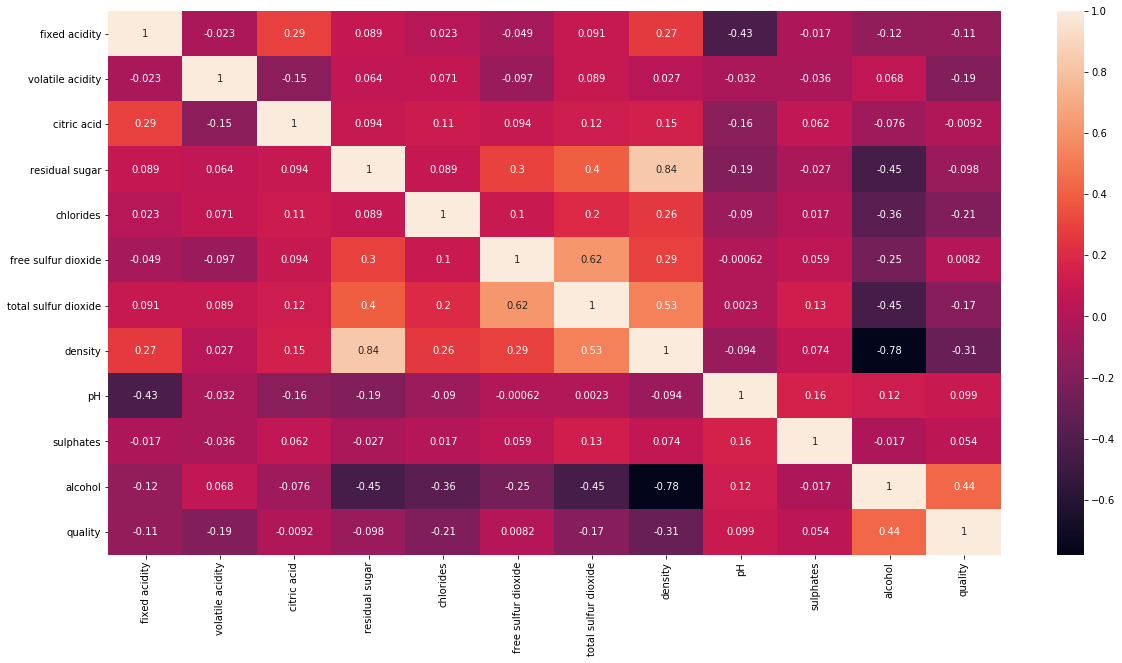

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

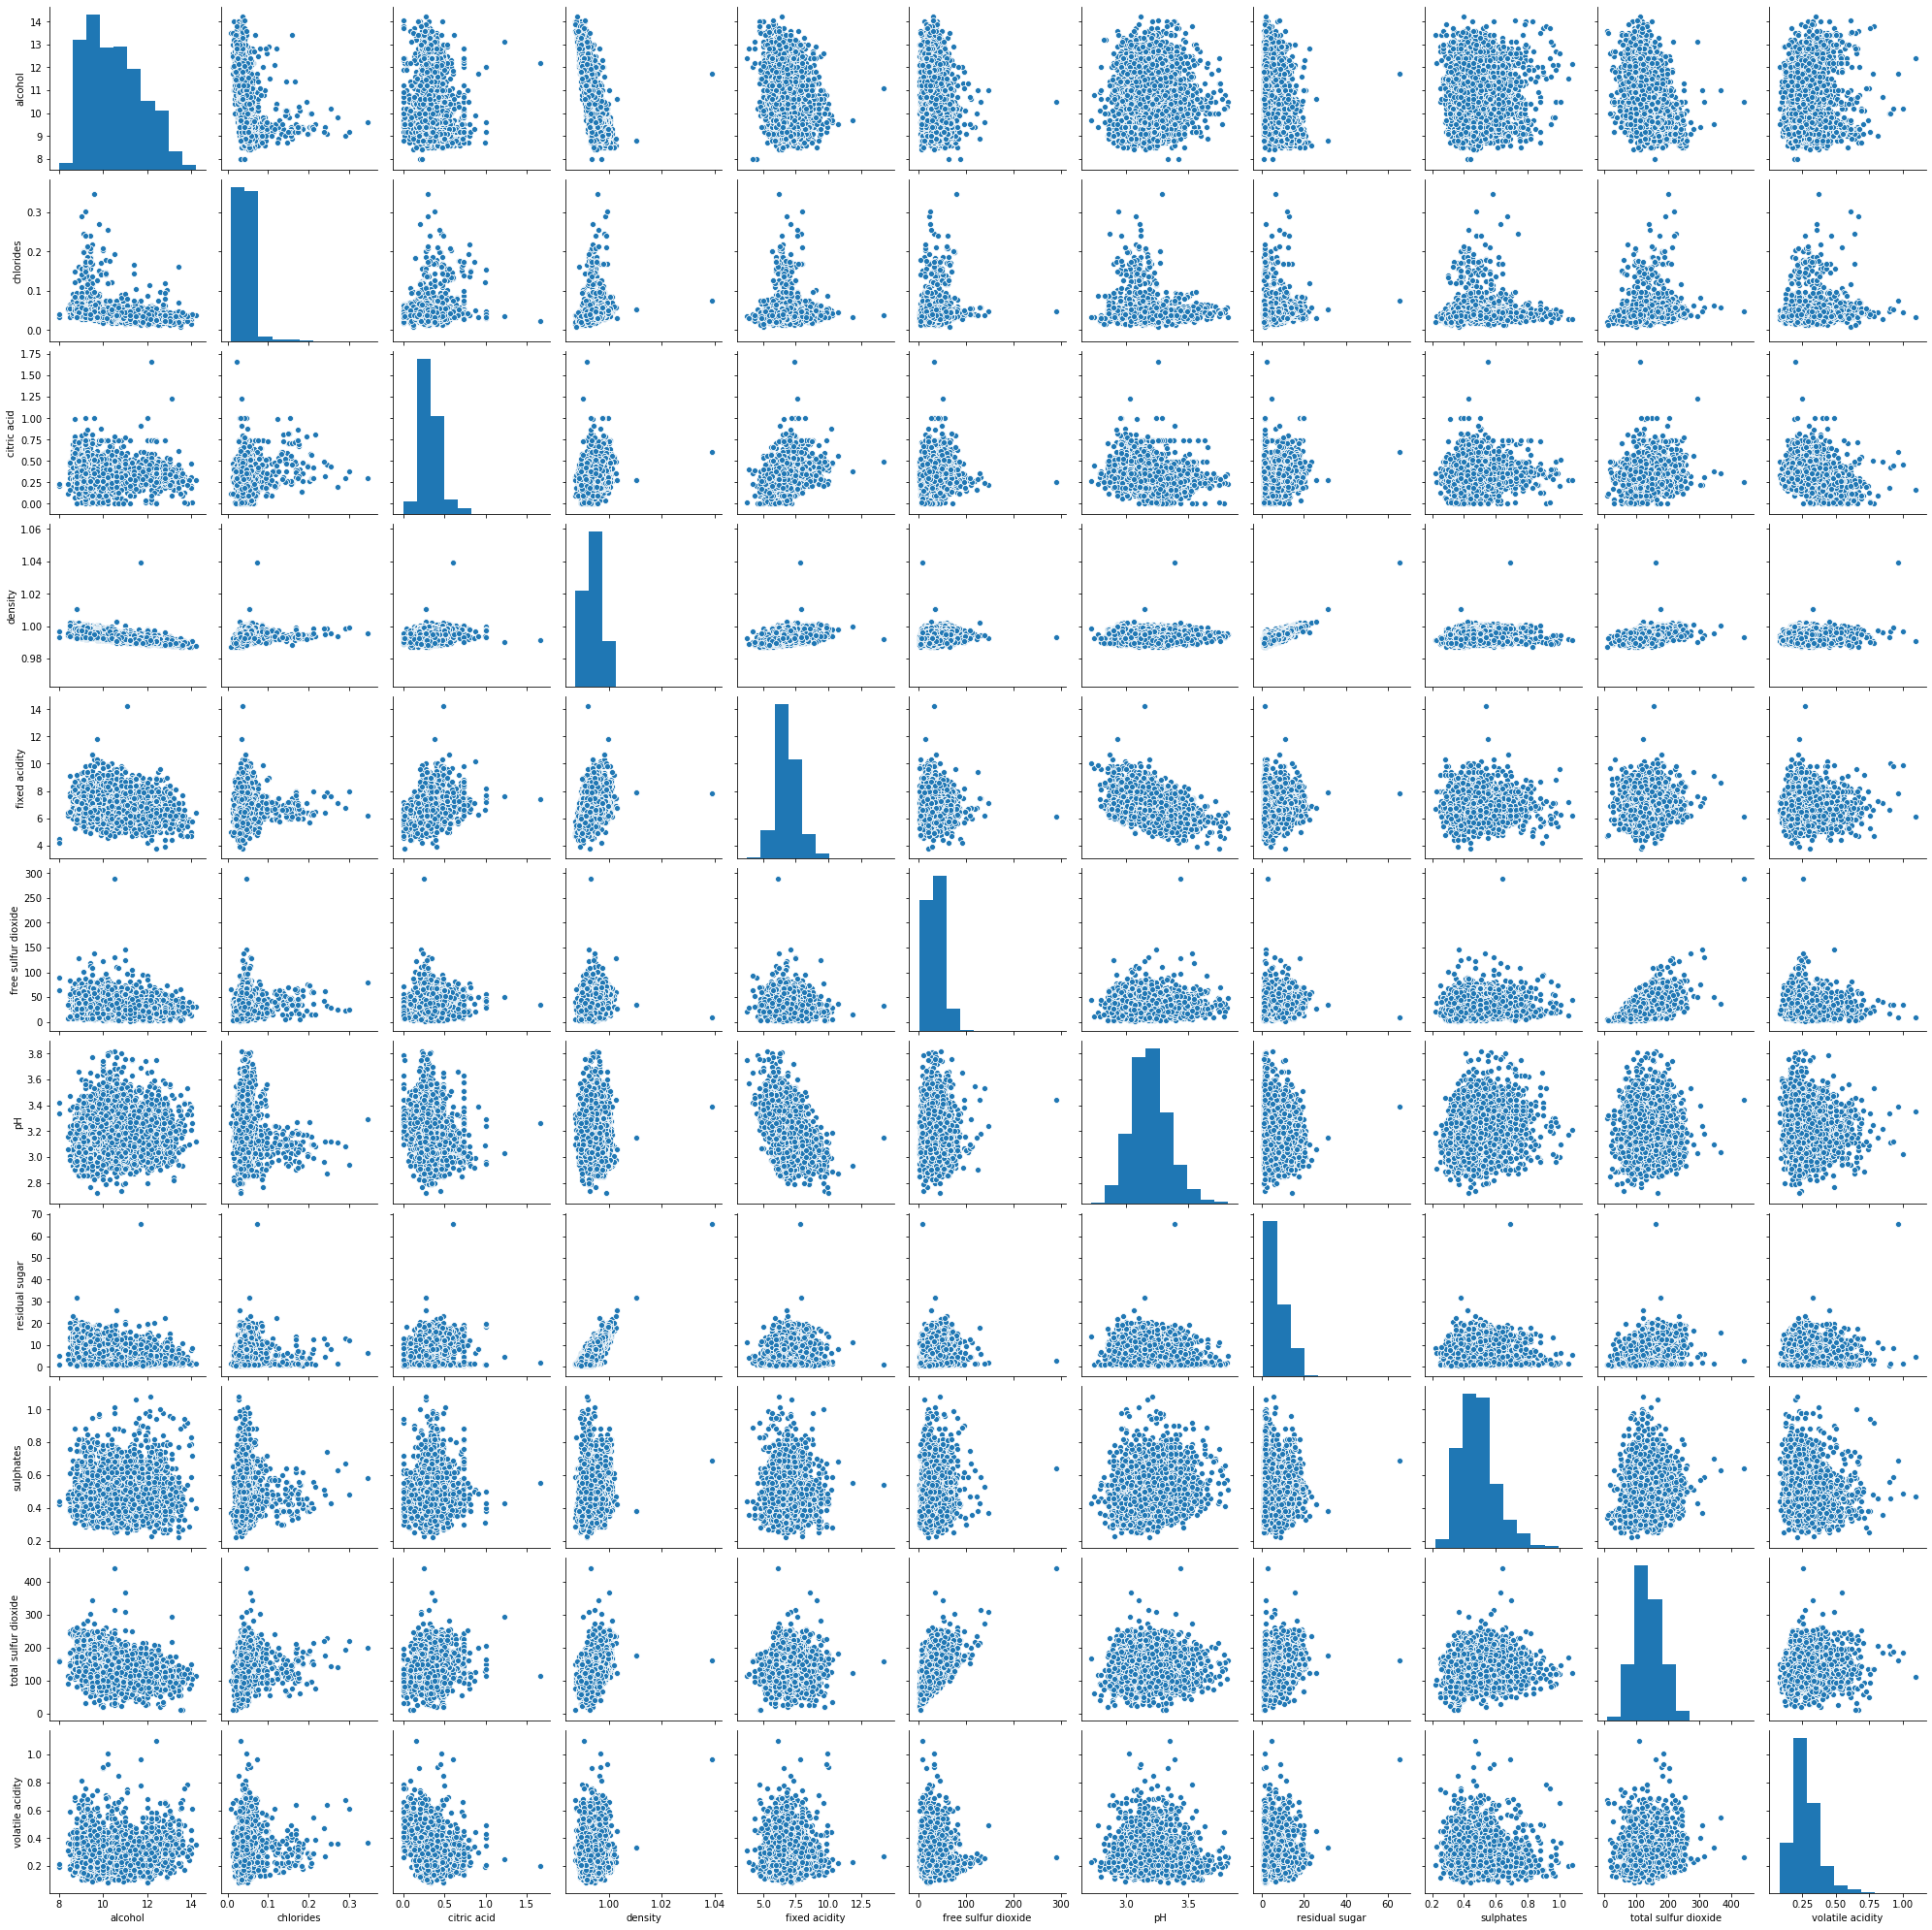

In [6]:
sns.pairplot(df[df.columns.difference(['quality'])])


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['quality'])],df['quality'], test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

## 1. Decision trees classification
In this task we will try to predict wine quality based on its features by fitting a decision tree model. Fit a decision tree classifier by making a grid search over loss functions: 'giny', 'entropy' and over max_leaf_nodes parameter. Choose this parameters via 5-Fold cross-validation. Visualize the best model's tree diagram

In [9]:
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', "entropy"], 'max_leaf_nodes': range(2,60)}
grid = GridSearchCV(model,param_grid,refit=True,scoring='accuracy',verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
[CV] criterion=gini, max_leaf_nodes=2 ................................
[CV] .... criterion=gini, max_leaf_nodes=2, score=0.437, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2 ................................
[CV] .... criterion=gini, max_leaf_nodes=2, score=0.450, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2 ................................
[CV] .... criterion=gini, max_leaf_nodes=2, score=0.450, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2 ................................
[CV] .... criterion=gini, max_leaf_nodes=2, score=0.451, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2 ................................
[CV] .... criterion=gini, max_leaf_nodes=2, score=0.477, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=3 ................................
[CV] .... criterion=gini, max_leaf_nodes=3, score=0.531, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=3 ................................
[CV] .... crit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_leaf_nodes=4 ................................
[CV] .... criterion=gini, max_leaf_nodes=4, score=0.537, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=4 ................................
[CV] .... criterion=gini, max_leaf_nodes=4, score=0.521, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=4 ................................
[CV] .... criterion=gini, max_leaf_nodes=4, score=0.504, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=4 ................................
[CV] .... criterion=gini, max_leaf_nodes=4, score=0.519, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] .... criterion=gini, max_leaf_nodes=5, score=0.528, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] .... criterion=gini, max_leaf_nodes=5, score=0.537, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5 ................................
[CV] .... criterion=gini, max_leaf_nodes=5, score=0.537, total=   0.0s
[CV] 

[CV] ... criterion=gini, max_leaf_nodes=16, score=0.544, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16 ...............................
[CV] ... criterion=gini, max_leaf_nodes=16, score=0.540, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16 ...............................
[CV] ... criterion=gini, max_leaf_nodes=16, score=0.525, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16 ...............................
[CV] ... criterion=gini, max_leaf_nodes=16, score=0.516, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17 ...............................
[CV] ... criterion=gini, max_leaf_nodes=17, score=0.529, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17 ...............................
[CV] ... criterion=gini, max_leaf_nodes=17, score=0.532, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17 ...............................
[CV] ... criterion=gini, max_leaf_nodes=17, score=0.558, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17 ...............................
[CV] .

[CV] ... criterion=gini, max_leaf_nodes=28, score=0.525, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28 ...............................
[CV] ... criterion=gini, max_leaf_nodes=28, score=0.544, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28 ...............................
[CV] ... criterion=gini, max_leaf_nodes=28, score=0.559, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28 ...............................
[CV] ... criterion=gini, max_leaf_nodes=28, score=0.531, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28 ...............................
[CV] ... criterion=gini, max_leaf_nodes=28, score=0.525, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=29 ...............................
[CV] ... criterion=gini, max_leaf_nodes=29, score=0.525, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=29 ...............................
[CV] ... criterion=gini, max_leaf_nodes=29, score=0.547, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=29 ...............................
[CV] .

[CV] ... criterion=gini, max_leaf_nodes=39, score=0.518, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40 ...............................
[CV] ... criterion=gini, max_leaf_nodes=40, score=0.531, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40 ...............................
[CV] ... criterion=gini, max_leaf_nodes=40, score=0.547, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40 ...............................
[CV] ... criterion=gini, max_leaf_nodes=40, score=0.559, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40 ...............................
[CV] ... criterion=gini, max_leaf_nodes=40, score=0.550, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40 ...............................
[CV] ... criterion=gini, max_leaf_nodes=40, score=0.518, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41 ...............................
[CV] ... criterion=gini, max_leaf_nodes=41, score=0.531, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41 ...............................
[CV] .

[CV] ... criterion=gini, max_leaf_nodes=52, score=0.544, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52 ...............................
[CV] ... criterion=gini, max_leaf_nodes=52, score=0.510, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53 ...............................
[CV] ... criterion=gini, max_leaf_nodes=53, score=0.536, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53 ...............................
[CV] ... criterion=gini, max_leaf_nodes=53, score=0.544, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53 ...............................
[CV] ... criterion=gini, max_leaf_nodes=53, score=0.548, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53 ...............................
[CV] ... criterion=gini, max_leaf_nodes=53, score=0.545, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=53 ...............................
[CV] ... criterion=gini, max_leaf_nodes=53, score=0.508, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=54 ...............................
[CV] .

[CV] . criterion=entropy, max_leaf_nodes=7, score=0.510, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=7 .............................
[CV] . criterion=entropy, max_leaf_nodes=7, score=0.517, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=7 .............................
[CV] . criterion=entropy, max_leaf_nodes=7, score=0.521, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=7 .............................
[CV] . criterion=entropy, max_leaf_nodes=7, score=0.505, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=7 .............................
[CV] . criterion=entropy, max_leaf_nodes=7, score=0.520, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8 .............................
[CV] . criterion=entropy, max_leaf_nodes=8, score=0.510, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8 .............................
[CV] . criterion=entropy, max_leaf_nodes=8, score=0.513, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8 .............................
[CV] .

[CV]  criterion=entropy, max_leaf_nodes=19, score=0.520, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=19 ............................
[CV]  criterion=entropy, max_leaf_nodes=19, score=0.524, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=19 ............................
[CV]  criterion=entropy, max_leaf_nodes=19, score=0.502, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=19 ............................
[CV]  criterion=entropy, max_leaf_nodes=19, score=0.537, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=19 ............................
[CV]  criterion=entropy, max_leaf_nodes=19, score=0.505, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=20 ............................
[CV]  criterion=entropy, max_leaf_nodes=20, score=0.520, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=20 ............................
[CV]  criterion=entropy, max_leaf_nodes=20, score=0.524, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=20 ............................
[CV]  

[CV]  criterion=entropy, max_leaf_nodes=30, score=0.534, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30 ............................
[CV]  criterion=entropy, max_leaf_nodes=30, score=0.511, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31 ............................
[CV]  criterion=entropy, max_leaf_nodes=31, score=0.510, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31 ............................
[CV]  criterion=entropy, max_leaf_nodes=31, score=0.527, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31 ............................
[CV]  criterion=entropy, max_leaf_nodes=31, score=0.510, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31 ............................
[CV]  criterion=entropy, max_leaf_nodes=31, score=0.534, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31 ............................
[CV]  criterion=entropy, max_leaf_nodes=31, score=0.512, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=32 ............................
[CV]  

[CV]  criterion=entropy, max_leaf_nodes=42, score=0.505, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42 ............................
[CV]  criterion=entropy, max_leaf_nodes=42, score=0.552, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42 ............................
[CV]  criterion=entropy, max_leaf_nodes=42, score=0.519, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=43 ............................
[CV]  criterion=entropy, max_leaf_nodes=43, score=0.521, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=43 ............................
[CV]  criterion=entropy, max_leaf_nodes=43, score=0.514, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=43 ............................
[CV]  criterion=entropy, max_leaf_nodes=43, score=0.507, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=43 ............................
[CV]  criterion=entropy, max_leaf_nodes=43, score=0.550, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=43 ............................
[CV]  

[CV]  criterion=entropy, max_leaf_nodes=54, score=0.513, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54 ............................
[CV]  criterion=entropy, max_leaf_nodes=54, score=0.550, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54 ............................
[CV]  criterion=entropy, max_leaf_nodes=54, score=0.515, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=55 ............................
[CV]  criterion=entropy, max_leaf_nodes=55, score=0.520, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=55 ............................
[CV]  criterion=entropy, max_leaf_nodes=55, score=0.509, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=55 ............................
[CV]  criterion=entropy, max_leaf_nodes=55, score=0.512, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=55 ............................
[CV]  criterion=entropy, max_leaf_nodes=55, score=0.550, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=55 ............................
[CV]  

[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:   20.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [10]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5423318319153274 corresponding to hyperparameters {'criterion': 'gini', 'max_leaf_nodes': 41}


In [11]:
model = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=41)

In [12]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(model,X_train, X_test, y_train, y_test)

Accuracy on training set:
0.5984209093384155
Accuracy on testing set:
0.529795918367347
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        32
           5       0.55      0.65      0.60       358
           6       0.52      0.62      0.57       544
           7       0.50      0.32      0.39       241
           8       0.50      0.05      0.09        43

    accuracy                           0.53      1225
   macro avg       0.35      0.27      0.27      1225
weighted avg       0.51      0.53      0.51      1225

Confusion Matrix:
[[  0   0   4   3   0   0]
 [  0   0  19  13   0   0]
 [  0   0 231 121   6   0]
 [  0   2 153 338  50   1]
 [  0   0   9 153  78   1]
 [  0   0   1  19  21   2]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


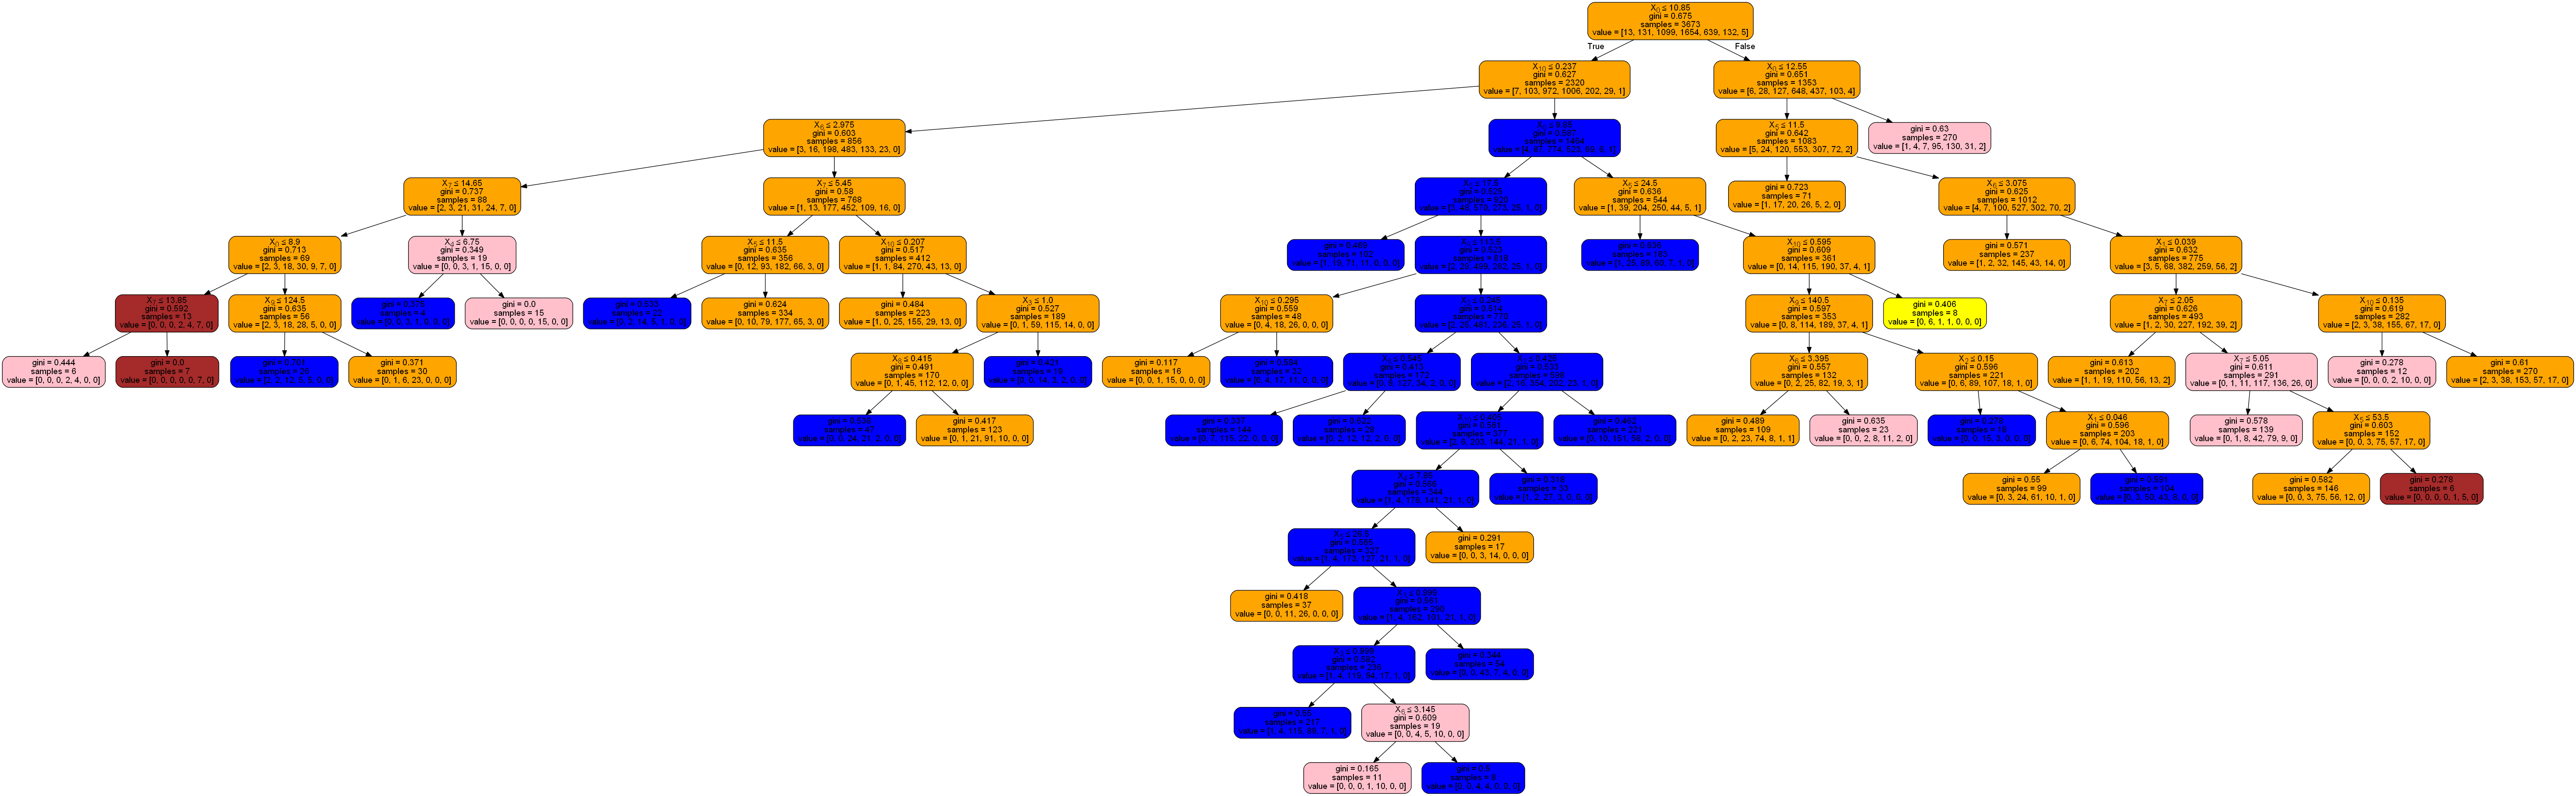

In [13]:
from IPython.display import Image, display
dot_data = tree.export_graphviz(model, out_file=None,   
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'yellow', 'blue','orange','pink','brown')
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        color = '#{:02x}{:02x}{:02x}{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2], values[3], values[4], values[5])
        node.set_fillcolor(colors[np.argmax(values)])

graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

## 2. Comparison classification
Try to predict wine quality with other classification tools that we studied(Logistic Regression, SVM, LDA) compare the accuracies and f-scores of all models on the test set and choose the best performing algorithm. 

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
param_grid1 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}
grid1 = RandomizedSearchCV(SVC(),param_grid1,refit=True,verbose=3,cv=5)
grid1.fit(X_train1,y_train)
best_score1, best_score_id1 = grid1.cv_results_['mean_test_score'].max(),grid1.cv_results_['mean_test_score'].argmax()
best_hyperparams1 = grid1.cv_results_['params'][best_score_id1]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score1, best_hyperparams1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=linear, gamma=0.01, C=1 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... kernel=linear, gamma=0.01, C=1, score=0.536, total=   0.5s
[CV] kernel=linear, gamma=0.01, C=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...... kernel=linear, gamma=0.01, C=1, score=0.528, total=   0.4s
[CV] kernel=linear, gamma=0.01, C=1 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ...... kernel=linear, gamma=0.01, C=1, score=0.528, total=   0.4s
[CV] kernel=linear, gamma=0.01, C=1 ..................................
[CV] ...... kernel=linear, gamma=0.01, C=1, score=0.529, total=   0.4s
[CV] kernel=linear, gamma=0.01, C=1 ..................................
[CV] ...... kernel=linear, gamma=0.01, C=1, score=0.520, total=   0.4s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.552, total=   2.8s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.559, total=   2.7s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.565, total=   2.7s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ...... kernel=rbf, gamma=0.01, C=1000, score=0.568, total=   2.9s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 160.3min finished


The best test score is 0.629726593634729 corresponding to hyperparameters {'kernel': 'rbf', 'gamma': 1, 'C': 1000}


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid =  {'C': [0.01,0.1,1, 10, 100, 1000], 'l1_ratio':[0,0.25,0.5,0.75,1] }
grid2 = GridSearchCV(logreg,param_grid,refit=True,scoring='accuracy',verbose=3,cv=5)
grid2.fit(X_train1,y_train)
best_score2, best_score_id2 = grid2.cv_results_['mean_test_score'].max(),grid2.cv_results_['mean_test_score'].argmax()
best_hyperparams2 = grid2.cv_results_['params'][best_score_id2]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score2, best_hyperparams2))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=0.01, l1_ratio=0, score=0.520, total=   0.1s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.552, total=   0.1s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.546, total=   0.1s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=0.01, l1_ratio=0, score=0.529, total=   0.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.520, total=   0.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ............... C=0.01, l1_ratio=0.25, score=0.552, total=   0.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.546, total=   0.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.529, total=   0.1s
[CV] C=0.01, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.01, l1_ratio=0.5, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.520, total=   0.1s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.552, total=   0.1s
[CV] C=0.01, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.01, l1_ratio=0.5, score=0.546, total=   0.1s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.529, total=   0.1s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ............... C=0.01, l1_ratio=0.75, score=0.520, total=   0.1s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.552, total=   0.1s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.546, total=   0.1s
[CV] C=0.01, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ............... C=0.01, l1_ratio=0.75, score=0.529, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.520, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=0.01, l1_ratio=1, score=0.552, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.546, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.529, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=0, score=0.540, total=   0.2s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=0, score=0.566, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.545, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=0, score=0.537, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.540, total=   0.2s
[CV] C=0.1, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.25, score=0.546, total=   0.2s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.566, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.25, score=0.545, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.537, total=   0.2s
[CV] C=0.1, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=0.1, l1_ratio=0.5, score=0.540, total=   0.2s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=0.1, l1_ratio=0.5, score=0.566, total=   0.2s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.545, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=0.1, l1_ratio=0.5, score=0.537, total=   0.2s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.540, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.75, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.566, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=0.1, l1_ratio=0.75, score=0.545, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.537, total=   0.2s
[CV] C=0.1, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=1, score=0.540, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=1, score=0.566, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.545, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................... C=0.1, l1_ratio=1, score=0.537, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ..................... C=1, l1_ratio=0, score=0.550, total=   0.2s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.547, total=   0.2s
[CV] C=1, l1_ratio=0 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ..................... C=1, l1_ratio=0, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.531, total=   0.2s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................. C=1, l1_ratio=0.25, score=0.550, total=   0.2s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.547, total=   0.2s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................. C=1, l1_ratio=0.25, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=0.25 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................. C=1, l1_ratio=0.25, score=0.531, total=   0.2s
[CV] C=1, l1_ratio=0.5 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................... C=1, l1_ratio=0.5, score=0.550, total=   0.2s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.547, total=   0.2s
[CV] C=1, l1_ratio=0.5 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................... C=1, l1_ratio=0.5, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=0.5 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................... C=1, l1_ratio=0.5, score=0.531, total=   0.2s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.550, total=   0.2s
[CV] C=1, l1_ratio=0.75 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................. C=1, l1_ratio=0.75, score=0.547, total=   0.2s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=0.75 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=1, l1_ratio=0.75, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=0.75 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................. C=1, l1_ratio=0.75, score=0.531, total=   0.2s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.550, total=   0.2s
[CV] C=1, l1_ratio=1 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ..................... C=1, l1_ratio=1, score=0.547, total=   0.2s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=1 .................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ..................... C=1, l1_ratio=1, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.531, total=   0.2s
[CV] C=10, l1_ratio=0 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................... C=10, l1_ratio=0, score=0.548, total=   0.2s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.550, total=   0.2s
[CV] C=10, l1_ratio=0 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................... C=10, l1_ratio=0, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................... C=10, l1_ratio=0, score=0.546, total=   0.2s
[CV] C=10, l1_ratio=0 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................... C=10, l1_ratio=0, score=0.533, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.548, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................. C=10, l1_ratio=0.25, score=0.550, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................. C=10, l1_ratio=0.25, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.546, total=   0.2s
[CV] C=10, l1_ratio=0.25 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................. C=10, l1_ratio=0.25, score=0.533, total=   0.2s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.548, total=   0.2s
[CV] C=10, l1_ratio=0.5 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................. C=10, l1_ratio=0.5, score=0.550, total=   0.2s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.5 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=10, l1_ratio=0.5, score=0.546, total=   0.2s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.533, total=   0.2s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................. C=10, l1_ratio=0.75, score=0.548, total=   0.2s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.550, total=   0.2s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................. C=10, l1_ratio=0.75, score=0.546, total=   0.2s
[CV] C=10, l1_ratio=0.75 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=10, l1_ratio=0.75, score=0.533, total=   0.2s
[CV] C=10, l1_ratio=1 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, l1_ratio=1, score=0.548, total=   0.2s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.550, total=   0.2s
[CV] C=10, l1_ratio=1 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, l1_ratio=1, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=1 ................................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................... C=10, l1_ratio=1, score=0.546, total=   0.2s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.533, total=   0.2s
[CV] C=100, l1_ratio=0 ...............................................
[CV] ................... C=100, l1_ratio=0, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0 ...............................................
[CV] ................... C=100, l1_ratio=0, score=0.547, total=   0.2s
[CV] C=100, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................... C=100, l1_ratio=0, score=0.555, total=   0.2s
[CV] C=100, l1_ratio=0 ...............................................
[CV] ................... C=100, l1_ratio=0, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................... C=100, l1_ratio=0, score=0.530, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................
[CV] ................ C=100, l1_ratio=0.25, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................ C=100, l1_ratio=0.25, score=0.547, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................
[CV] ................ C=100, l1_ratio=0.25, score=0.555, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................ C=100, l1_ratio=0.25, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.25 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=100, l1_ratio=0.25, score=0.530, total=   0.2s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................. C=100, l1_ratio=0.5, score=0.547, total=   0.2s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.555, total=   0.2s
[CV] C=100, l1_ratio=0.5 .............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................. C=100, l1_ratio=0.5, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.5 .............................................
[CV] ................. C=100, l1_ratio=0.5, score=0.530, total=   0.2s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................ C=100, l1_ratio=0.75, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.75 ............................................
[CV] ................ C=100, l1_ratio=0.75, score=0.547, total=   0.2s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, l1_ratio=0.75, score=0.555, total=   0.2s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, l1_ratio=0.75, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.75 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ C=100, l1_ratio=0.75, score=0.530, total=   0.2s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................... C=100, l1_ratio=1, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................... C=100, l1_ratio=1, score=0.547, total=   0.2s
[CV] C=100, l1_ratio=1 ...............................................
[CV] ................... C=100, l1_ratio=1, score=0.555, total=   0.2s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................... C=100, l1_ratio=1, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=1 ...............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ................... C=100, l1_ratio=1, score=0.530, total=   0.2s
[CV] C=1000, l1_ratio=0 ..............................................
[CV] .................. C=1000, l1_ratio=0, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=0 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=1000, l1_ratio=0, score=0.550, total=   0.2s
[CV] C=1000, l1_ratio=0 ..............................................
[CV] .................. C=1000, l1_ratio=0, score=0.556, total=   0.2s
[CV] C=1000, l1_ratio=0 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] .................. C=1000, l1_ratio=0, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=1000, l1_ratio=0, score=0.530, total=   0.2s
[CV] C=1000, l1_ratio=0.25 ...........................................
[CV] ............... C=1000, l1_ratio=0.25, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=0.25 ...........................................
[CV] ............... C=1000, l1_ratio=0.25, score=0.550, total=   0.2s
[CV] C=1000, l1_ratio=0.25 ...........................................

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



[CV] ............... C=1000, l1_ratio=0.25, score=0.556, total=   0.2s
[CV] C=1000, l1_ratio=0.25 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ............... C=1000, l1_ratio=0.25, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0.25 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... C=1000, l1_ratio=0.25, score=0.530, total=   0.2s
[CV] C=1000, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ................ C=1000, l1_ratio=0.5, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=0.5 ............................................
[CV] ................ C=1000, l1_ratio=0.5, score=0.550, total=   0.2s
[CV] C=1000, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................ C=1000, l1_ratio=0.5, score=0.556, total=   0.2s
[CV] C=1000, l1_ratio=0.5 ............................................
[CV] ................ C=1000, l1_ratio=0.5, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0.5 ............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ................ C=1000, l1_ratio=0.5, score=0.530, total=   0.2s
[CV] C=1000, l1_ratio=0.75 ...........................................
[CV] ............... C=1000, l1_ratio=0.75, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............... C=1000, l1_ratio=0.75, score=0.550, total=   0.2s
[CV] C=1000, l1_ratio=0.75 ...........................................
[CV] ............... C=1000, l1_ratio=0.75, score=0.556, total=   0.2s
[CV] C=1000, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sk

[CV] ............... C=1000, l1_ratio=0.75, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0.75 ...........................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] ............... C=1000, l1_ratio=0.75, score=0.530, total=   0.2s
[CV] C=1000, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1000, l1_ratio=1, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.550, total=   0.2s
[CV] C=1000, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[CV] .................. C=1000, l1_ratio=1, score=0.556, total=   0.2s
[CV] C=1000, l1_ratio=1 ..............................................


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=1000, l1_ratio=1, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.530, total=   0.2s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   24.3s finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


The best test score is 0.547231273980982 corresponding to hyperparameters {'C': 1000, 'l1_ratio': 0}


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()


In [32]:
#SVD
train_and_evaluate(SVC(kernel='rbf',gamma=1, C=1000),X_train1, X_test1, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.6555102040816326
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.40      0.12      0.19        32
           5       0.68      0.59      0.64       358
           6       0.61      0.78      0.69       544
           7       0.75      0.59      0.66       241
           8       0.89      0.40      0.55        43

    accuracy                           0.66      1225
   macro avg       0.56      0.42      0.45      1225
weighted avg       0.66      0.66      0.65      1225

Confusion Matrix:
[[  0   0   1   6   0   0]
 [  0   4   7  21   0   0]
 [  0   4 213 136   5   0]
 [  0   2  78 426  38   0]
 [  0   0  10  86 143   2]
 [  0   0   2  19   5  17]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#logreg
train_and_evaluate(LogisticRegression(C=1000,l1_ratio=0),X_train1, X_test1, y_train, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


Accuracy on training set:
0.5496869044377892
Accuracy on testing set:
0.5265306122448979
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.03      0.06        32
           5       0.56      0.52      0.54       358
           6       0.51      0.73      0.61       544
           7       0.52      0.24      0.33       241
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1225
   macro avg       0.30      0.22      0.22      1225
weighted avg       0.51      0.53      0.49      1225

Confusion Matrix:
[[  0   0   3   2   1   1   0]
 [  0   1  17  14   0   0   0]
 [  0   1 186 167   4   0   0]
 [  0   0 106 399  38   0   1]
 [  0   0  18 164  59   0   0]
 [  0   0   2  29  11   0   1]
 [  0   0   0   0   0   0   0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set 

In [31]:
#LDA
train_and_evaluate(lda,X_train1, X_test1, y_train, y_test)

Accuracy on training set:
0.5469643343316091
Accuracy on testing set:
0.5151020408163265
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.30      0.25      0.27        32
           5       0.56      0.49      0.52       358
           6       0.51      0.70      0.59       544
           7       0.48      0.27      0.34       241
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00         0

    accuracy                           0.52      1225
   macro avg       0.41      0.26      0.28      1225
weighted avg       0.50      0.52      0.49      1225

Confusion Matrix:
[[  1   0   3   3   0   0   0]
 [  0   8   9  15   0   0   0]
 [  0  13 176 166   2   1   0]
 [  0   5 106 381  51   0   1]
 [  0   0  20 156  65   0   0]
 [  0   1   1  23  18   0   0]
 [  0   0   0   0   0   0   0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Decision trees regression
In this task we will use all the columns to predict alcohol concentration of a wine. Use the directives in task 1 as a guide to fit a Decision tree regressor.

In [42]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(df[df.columns.difference(['quality', 'alcohol'])],df['alcohol'], test_size=0.25, random_state=42)


In [43]:
X_train21=X_train2[['density']]
X_test21=X_test2[['density']]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.transform(X_test2)

In [58]:
model2 = DecisionTreeRegressor()
param_grid = {'criterion': ['mse',' friedman_mse',' mae'], 'max_leaf_nodes': range(2,60)}
grid = GridSearchCV(model2,param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train2,y_train2)

Fitting 5 folds for each of 174 candidates, totalling 870 fits
[CV] criterion=mse, max_leaf_nodes=2 .................................
[CV] ..... criterion=mse, max_leaf_nodes=2, score=0.526, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=2 .................................
[CV] ..... criterion=mse, max_leaf_nodes=2, score=0.482, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=2 .................................
[CV] ..... criterion=mse, max_leaf_nodes=2, score=0.518, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=2 .................................
[CV] ..... criterion=mse, max_leaf_nodes=2, score=0.495, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=2 .................................
[CV] ..... criterion=mse, max_leaf_nodes=2, score=0.490, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=3 .................................
[CV] ..... criterion=mse, max_leaf_nodes=3, score=0.630, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=3 .................................
[CV] ..... cri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... criterion=mse, max_leaf_nodes=4, score=0.623, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=4 .................................
[CV] ..... criterion=mse, max_leaf_nodes=4, score=0.627, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=5 .................................
[CV] ..... criterion=mse, max_leaf_nodes=5, score=0.679, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=5 .................................
[CV] ..... criterion=mse, max_leaf_nodes=5, score=0.660, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=5 .................................
[CV] ..... criterion=mse, max_leaf_nodes=5, score=0.669, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=5 .................................
[CV] ..... criterion=mse, max_leaf_nodes=5, score=0.647, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=5 .................................
[CV] ..... criterion=mse, max_leaf_nodes=5, score=0.654, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=6 .................................
[CV] .

[CV] .... criterion=mse, max_leaf_nodes=17, score=0.771, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=17 ................................
[CV] .... criterion=mse, max_leaf_nodes=17, score=0.765, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=17 ................................
[CV] .... criterion=mse, max_leaf_nodes=17, score=0.768, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=18 ................................
[CV] .... criterion=mse, max_leaf_nodes=18, score=0.778, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=18 ................................
[CV] .... criterion=mse, max_leaf_nodes=18, score=0.784, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=18 ................................
[CV] .... criterion=mse, max_leaf_nodes=18, score=0.776, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=18 ................................
[CV] .... criterion=mse, max_leaf_nodes=18, score=0.771, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=18 ................................
[CV] .

[CV] .... criterion=mse, max_leaf_nodes=30, score=0.802, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=30 ................................
[CV] .... criterion=mse, max_leaf_nodes=30, score=0.804, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=30 ................................
[CV] .... criterion=mse, max_leaf_nodes=30, score=0.786, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=30 ................................
[CV] .... criterion=mse, max_leaf_nodes=30, score=0.785, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=30 ................................
[CV] .... criterion=mse, max_leaf_nodes=30, score=0.800, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=31 ................................
[CV] .... criterion=mse, max_leaf_nodes=31, score=0.793, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=31 ................................
[CV] .... criterion=mse, max_leaf_nodes=31, score=0.804, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=31 ................................
[CV] .

[CV] .... criterion=mse, max_leaf_nodes=41, score=0.809, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=42 ................................
[CV] .... criterion=mse, max_leaf_nodes=42, score=0.813, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=42 ................................
[CV] .... criterion=mse, max_leaf_nodes=42, score=0.810, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=42 ................................
[CV] .... criterion=mse, max_leaf_nodes=42, score=0.805, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=42 ................................
[CV] .... criterion=mse, max_leaf_nodes=42, score=0.792, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=42 ................................
[CV] .... criterion=mse, max_leaf_nodes=42, score=0.813, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=43 ................................
[CV] .... criterion=mse, max_leaf_nodes=43, score=0.814, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=43 ................................
[CV] .

[CV] .... criterion=mse, max_leaf_nodes=54, score=0.818, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=54 ................................
[CV] .... criterion=mse, max_leaf_nodes=54, score=0.822, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=54 ................................
[CV] .... criterion=mse, max_leaf_nodes=54, score=0.796, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=54 ................................
[CV] .... criterion=mse, max_leaf_nodes=54, score=0.826, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=55 ................................
[CV] .... criterion=mse, max_leaf_nodes=55, score=0.826, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=55 ................................
[CV] .... criterion=mse, max_leaf_nodes=55, score=0.819, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=55 ................................
[CV] .... criterion=mse, max_leaf_nodes=55, score=0.824, total=   0.0s
[CV] criterion=mse, max_leaf_nodes=55 ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

[CV]  criterion= friedman_mse, max_leaf_nodes=3, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=4 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=4 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=4 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=4 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=4 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=5 .......................
[CV]  criterion= friedman_mse, max_leaf_nodes=5, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=5 .........

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

[CV]  criterion= friedman_mse, max_leaf_nodes=13, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=13 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=13, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=14 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=14, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=14 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=14, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=14 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=14, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=14 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=14, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=14 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=14, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=15 .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai


[CV]  criterion= friedman_mse, max_leaf_nodes=23, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=23 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=23, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=23 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=23, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=23 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=23, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=23 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=23, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=24 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=24, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=24 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=24, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=24 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

[CV]  criterion= friedman_mse, max_leaf_nodes=32, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=33 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=33 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=33 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=33 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=33 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=34 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=34, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=34 .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai


[CV]  criterion= friedman_mse, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=43 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=43 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=43 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=44 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=44, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=44 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=44, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=44 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=44, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=44 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

[CV]  criterion= friedman_mse, max_leaf_nodes=53, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=53 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=53, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=53 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=53, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=53 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=53, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=54 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=54, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=54 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=54, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=54 ......................
[CV]  criterion= friedman_mse, max_leaf_nodes=54, score=nan, total=   0.0s
[CV] criterion= friedman_mse, max_leaf_nodes=54 .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' friedman_mse'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyE

[CV] ...... criterion= mae, max_leaf_nodes=3, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=3 ................................
[CV] ...... criterion= mae, max_leaf_nodes=3, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=4 ................................
[CV] ...... criterion= mae, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=4 ................................
[CV] ...... criterion= mae, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=4 ................................
[CV] ...... criterion= mae, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=4 ................................
[CV] ...... criterion= mae, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=4 ................................
[CV] ...... criterion= mae, max_leaf_nodes=4, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=5 ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi


[CV] ..... criterion= mae, max_leaf_nodes=12, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=12 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=12, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=12 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=12, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=12 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=12, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=12 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=12, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=13 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=13, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=13 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=13, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=13 ...............................
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi

[CV] ..... criterion= mae, max_leaf_nodes=21, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=21 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=21, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=22 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=22, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=22 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=22, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=22 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=22, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=22 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=22, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=22 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=22, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=23 ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi

[CV] ..... criterion= mae, max_leaf_nodes=32, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=32 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=32, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=32 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=32, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=33 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=33 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=33 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=33 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=33, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=33 ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi

[CV] ..... criterion= mae, max_leaf_nodes=42, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=42 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=42, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=42 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=42, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=42 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=42, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=42 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=42, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=43 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=43 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=43, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=43 ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi

[CV] ..... criterion= mae, max_leaf_nodes=50, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=50 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=50, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=51 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=51, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=51 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=51, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=51 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=51, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=51 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=51, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=51 ...............................
[CV] ..... criterion= mae, max_leaf_nodes=51, score=nan, total=   0.0s
[CV] criterion= mae, max_leaf_nodes=52 ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: ' mae'

  Fi

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', ' friedman_mse', ' mae'],
                         'max_leaf_nodes': range(2, 60)},
             pre_dispatch

In [59]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is nan corresponding to hyperparameters {'criterion': ' friedman_mse', 'max_leaf_nodes': 2}


In [68]:
def train_and_evaluate_reg(reg, X_train, X_test, y_train, y_Test):
    
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Mean absolute error: %.2f'
          % metrics.mean_absolute_error(y_Test, y_pred))

    print('Mean squared error: %.2f'
          % metrics.mean_squared_error(y_Test, y_pred))

    print('Root mean squared error: %.2f'
          % np.sqrt(metrics.mean_squared_error(y_Test, y_pred)))

    print('R-squared: %.2f'
          % metrics.r2_score(y_Test, y_pred))

In [69]:
model2 = DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=2)
train_and_evaluate_reg(model2,X_train2, X_test2, y_train2,y_test2)

Mean absolute error: 0.70
Mean squared error: 0.72
Root mean squared error: 0.85
R-squared: 0.53


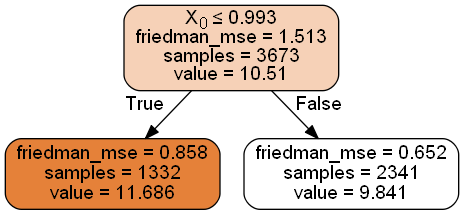

In [81]:
dot_data = tree.export_graphviz(model2, out_file=None,   
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

'''colors = ('red', 'yellow', 'blue','orange','pink','brown')
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        color = '#{:02x}{:02x}{:02x}{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2], values[3], values[4], values[5])
        node.set_fillcolor(colors[np.argmax(values)])'''

graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

In [76]:
train_and_evaluate_reg(model2,X_train21, X_test21, y_train2,y_test2)

Mean absolute error: 0.70
Mean squared error: 0.72
Root mean squared error: 0.85
R-squared: 0.53


## 4. Comparison regression
Predict wine alcohol concentration with Linear Regression. Compare mean absolute errors and rooted mean squared errors. What is the best model?

In [79]:
regr = LinearRegression()
train_and_evaluate_reg(regr ,X_train2, X_test2, y_train2,y_test2)

Mean absolute error: 0.29
Mean squared error: 0.14
Root mean squared error: 0.38
R-squared: 0.91


In [80]:
#With 1 feature
train_and_evaluate_reg(regr ,X_train21, X_test21, y_train2,y_test2)

Mean absolute error: 0.58
Mean squared error: 0.54
Root mean squared error: 0.74
R-squared: 0.64


In [ ]:
#The best model is Decision tree regressor